<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/up_test4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Candel, A., Parmar, V., LeDell, E., and Arora, A. (Jun 2020). Deep Learning
with H2O. http://h2o.ai/resources.

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/DeepLearningBooklet.pdf?_ga=2.184768361.1553179602.1592730801-433090902.1592730801



In [ ]:
!nvidia-smi

Thu Jun 25 00:56:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [ ]:
!pip install h2o

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import urllib
import h2o
from h2o.automl import H2OAutoML
import sys
import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
print('matplotlib: {}'.format(matplotlib.__version__))
#print('sklearn: {}'.format(sklearn.__version__))
#print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('sys: {}'.format(sys.version))

matplotlib: 3.2.2
seaborn: 0.10.1
pandas: 1.0.5
numpy: 1.18.5
sys: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,11 mins 55 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_qdz2wn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.178 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Get help
#help(h2o.estimators.glm.H2OGeneralizedLinearEstimator)
#help(h2o.estimators.gbm.H2OGradientBoostingEstimator)
#help(h2o.estimators.deeplearning.H2ODeepLearningEstimator)

# Show a demo
#h2o.demo("glm")
#h2o.demo("gbm")
#h2o.demo("deeplearning")

### 여러 파일 준비

In [ ]:
BASE_DIR = '/content'
#OUTPUT_FILE = os.path.join(BASE_DIR, 'tmp.csv')

#hkim_data=urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', OUTPUT_FILE)

# 드라이브 전체공유 후..

# column_2C_weka.csv
#hkim_data=urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1oMEvI6gWC4ZAqssQ3s3j6RkWUPa_TSwY', OUTPUT_FILE)

#churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
OUTPUT_FILE = os.path.join(BASE_DIR, 'QMS_NVOC_SORT.csv')
df = pd.read_csv(OUTPUT_FILE, delimiter = ',')
df.shape
df.dtypes


Unnamed: 0                 int64
a1.ucube_jnr_no           object
a2.firstlogtime           object
a2.buffer_overflow       float64
a2.pts_advanced_error    float64
a2.stb_rtp_errcnt        float64
a2.no_stream_error       float64
a2.not_decoding_error    float64
nvoc                     float64
dtype: object

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
0,111744,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,111745,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0
2,111746,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0
3,111747,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0
4,111748,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
hdf = h2o.import_file(OUTPUT_FILE)
hdf.types

Parse progress: |█████████████████████████████████████████████████████████| 100%


{'C1': 'int',
 'a1.ucube_jnr_no': 'enum',
 'a2.buffer_overflow': 'int',
 'a2.firstlogtime': 'time',
 'a2.no_stream_error': 'int',
 'a2.not_decoding_error': 'int',
 'a2.pts_advanced_error': 'int',
 'a2.stb_rtp_errcnt': 'int',
 'nvoc': 'int'}

In [ ]:
type(hdf)

h2o.frame.H2OFrame

In [ ]:
hdf.head()

C1,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
111744,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0,0,0,0,0,0
111745,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0,0,0,0,0,0
111746,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0,0,0,0,0,0
111747,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:30:00,0,0,0,0,0,0
111748,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:40:00,0,0,0,0,0,0
111749,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:50:00,0,0,0,0,0,0
111750,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:00:00,0,0,0,0,0,0
111751,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:10:00,0,0,0,0,0,0
111752,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:20:00,0,0,0,0,0,0
111753,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 01:30:00,0,0,0,0,0,0


In [ ]:
df.describe()

,Unnamed: 0,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
count,1.034923e+06,1.034922e+06,1.034922e+06,1.034922e+06,1.034922e+06,1.034922e+06,1.034922e+06
mean,6.585296e+05,1.547007e+00,1.678581e+00,1.586674e+01,1.494190e-01,-1.903912e-02,1.102499e-03
std,5.512899e+05,3.556977e+02,3.800356e+02,7.630603e+02,7.268688e+00,1.409506e-01,3.318560e-02
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.748585e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.474130e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.211195e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.603542e+06,1.588620e+05,1.588620e+05,1.576490e+05,6.000000e+02,1.500000e+01,1.000000e+00


In [ ]:
hdf.describe()

Rows:1034923
Cols:9




,C1,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
type,int,enum,time,int,int,int,int,int,int
mins,0.0,,1590969600000.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
mean,658529.6053899679,,1591314811488.983,1.5470074073215168,1.6785806080071726,15.866738749393681,0.1494189900301664,-0.019039115991350074,0.0011024985457841268
maxs,2603542.0,,1591660200000.0,158862.0,158862.0,157649.0,600.0,15.0,1.0
sigma,551289.9195256236,,199548104.72284076,355.69774984706834,380.03561798033104,763.0603149704959,7.268688401663489,0.14095061237171994,0.0331856008965256
zeros,1,,0,1013269,1013266,981046,1012783,1014830,1033781
missing,0,0,1,1,1,1,1,1,1
0,111744.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,111745.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0
2,111746.0,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 2진분류 시 target y는 factor(파이썬에서는 enum) 타입이어야...
hdf['nvoc'] = hdf['nvoc'].asfactor()
hdf.types

{'C1': 'int',
 'a1.ucube_jnr_no': 'enum',
 'a2.buffer_overflow': 'int',
 'a2.firstlogtime': 'time',
 'a2.no_stream_error': 'int',
 'a2.not_decoding_error': 'int',
 'a2.pts_advanced_error': 'int',
 'a2.stb_rtp_errcnt': 'int',
 'nvoc': 'enum'}

In [ ]:
data_train,data_test,data_valid = hdf.split_frame(ratios=[.7, .15])

In [ ]:
y = "nvoc"
x = hdf.columns
x.remove(y)
x.remove('C1')
x.remove('a1.ucube_jnr_no')
x.remove('a2.firstlogtime')
x

['a2.buffer_overflow',
 'a2.pts_advanced_error',
 'a2.stb_rtp_errcnt',
 'a2.no_stream_error',
 'a2.not_decoding_error']

#Create model

In [ ]:
#aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "GBM", "DeepLearning", "GLM", "DRF" ], verbosity="info", nfolds=0)
aml = H2OAutoML(max_models = 20, seed = 20, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0)

# Train model

In [ ]:
aml.train(x = x, y = y, training_frame = data_train, validation_frame=data_valid)
!nvidia-smi

AutoML progress: |
00:57:12.343: Project: AutoML_20200625_05712340
00:57:12.343: Cross-validation disabled by user: no fold column nor nfolds > 1.
00:57:12.346: Setting stopping tolerance adaptively based on the training frame: 0.0011750564921988265
00:57:12.346: Build control seed: 20
00:57:12.346: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
00:57:13.103: training frame: Frame key: automl_training_py_5_sid_bb17    cols: 9    rows: 651175  chunks: 8    size: 5565963  checksum: 834292123572255447
00:57:13.103: validation frame: Frame key: py_7_sid_bb17    cols: 9    rows: 155381  chunks: 8    size: 1379958  checksum: 4250925650137875718
00:57:13.122: leaderboard frame: Frame key: automl_leaderboard_py_5_sid_bb17    cols: 9    rows: 73065  chunks: 8    size: 723395  checksum: -5896384495845764710
00:57:13.122: blending frame: NULL
00:57:13.122: response column: nvo

In [ ]:
leaderboard = aml.leaderboard
leaderboard.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20200625_005712_model_5,0.603271,0.00897513,0.00479249,0.472751,0.0344957,0.00118995
GLM_1_AutoML_20200625_005712,0.601074,0.00919516,0.00311984,0.488876,0.0344868,0.00118934
GBM_grid__1_AutoML_20200625_005712_model_2,0.598828,0.00898065,0.00487896,0.483279,0.034465,0.00118784
GBM_1_AutoML_20200625_005712,0.593022,0.00935529,0.00406409,0.477751,0.0352247,0.00124078
DRF_1_AutoML_20200625_005712,0.592936,0.00908969,0.00441407,0.466977,0.0346039,0.00119743
GBM_grid__1_AutoML_20200625_005712_model_3,0.579291,0.00907557,0.0042673,0.483334,0.034575,0.00119543
GBM_2_AutoML_20200625_005712,0.573744,0.0104106,0.00408821,0.466867,0.0351935,0.00123858
XRT_1_AutoML_20200625_005712,0.564013,0.00939591,0.00420755,0.466901,0.0345627,0.00119458
GBM_5_AutoML_20200625_005712,0.563488,0.00903298,0.00426823,0.47771,0.0345139,0.00119121
GBM_3_AutoML_20200625_005712,0.56274,0.011305,0.0032045,0.452832,0.035272,0.00124411


#Test

In [ ]:
data_pred=aml.leader.predict(data_test)
data_pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.999017,0.000982888
0,0.999017,0.000982888
0,0.999017,0.000982888
0,0.999017,0.000982888
0,0.999017,0.000982888
0,0.999017,0.000982888
0,0.999017,0.000982888
0,0.999017,0.000982888
0,0.999017,0.000982888
0,0.999017,0.000982888


# Performance check


In [ ]:
aml.leader.model_performance(data_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.001144762531764301
RMSE: 0.033834339534920745
LogLoss: 0.008758970618842633
Mean Per-Class Error: 0.43594975415101045
AUC: 0.5629579699777691
AUCPR: 0.0042635355165669365
Gini: 0.1259159399555383

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.02295764962541489: 


,,0,1,Error,Rate
0,0,154992.0,132.0,0.0009,(132.0/155124.0)
1,1,171.0,7.0,0.9607,(171.0/178.0)
2,Total,155163.0,139.0,0.002,(303.0/155302.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,2.295765e-02,0.044164,79.0
1,max f2,7.351604e-03,0.045126,132.0
2,max f0point5,2.295765e-02,0.047684,79.0
3,max accuracy,3.590241e-01,0.998847,0.0
4,max precision,4.239473e-02,0.057692,38.0
5,max recall,1.488091e-06,1.000000,209.0
6,max specificity,3.590241e-01,0.999994,0.0
7,max absolute_mcc,2.295765e-02,0.043534,79.0
8,max min_per_class_accuracy,1.196893e-03,0.179775,195.0
9,max mean_per_class_accuracy,1.196893e-03,0.564050,195.0



Gains/Lift Table: Avg response rate:  0.11 %, avg score:  0.11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011185,2.734841e-03,9.543569,9.543569,0.010938,0.008832,0.010938,0.008832,0.106742,0.106742,854.356924,854.356924
1,,2,0.031873,1.713833e-03,1.086191,4.053962,0.001245,0.001761,0.004646,0.004242,0.022472,0.129213,8.619128,305.396209
2,,3,0.049716,1.280856e-03,2.204035,3.390039,0.002526,0.001330,0.003886,0.003197,0.039326,0.168539,120.403537,239.003942
3,,4,0.051822,1.196893e-03,5.336288,3.469118,0.006116,0.001197,0.003976,0.003116,0.011236,0.179775,433.628836,246.911788
4,,5,0.999697,9.828880e-04,0.859402,0.994683,0.000985,0.000983,0.001140,0.001093,0.814607,0.994382,-14.059755,-0.531695
5,,6,1.000000,1.000000e-19,18.563471,1.000000,0.021277,0.000089,0.001146,0.001093,0.005618,1.000000,1756.347119,0.000000


#나머지 모델도 테스트

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

['GBM_grid__1_AutoML_20200625_005712_model_5',
 'GLM_1_AutoML_20200625_005712',
 'GBM_grid__1_AutoML_20200625_005712_model_2',
 'GBM_1_AutoML_20200625_005712',
 'DRF_1_AutoML_20200625_005712',
 'GBM_grid__1_AutoML_20200625_005712_model_3',
 'GBM_2_AutoML_20200625_005712',
 'XRT_1_AutoML_20200625_005712',
 'GBM_5_AutoML_20200625_005712',
 'GBM_3_AutoML_20200625_005712',
 'GBM_grid__1_AutoML_20200625_005712_model_1',
 'GBM_4_AutoML_20200625_005712',
 'GBM_grid__1_AutoML_20200625_005712_model_4',
 'GBM_grid__1_AutoML_20200625_005712_model_6',
 'DeepLearning_1_AutoML_20200625_005712',
 'DeepLearning_grid__2_AutoML_20200625_005712_model_2',
 'DeepLearning_grid__1_AutoML_20200625_005712_model_2',
 'DeepLearning_grid__2_AutoML_20200625_005712_model_1',
 'DeepLearning_grid__3_AutoML_20200625_005712_model_1',
 'DeepLearning_grid__1_AutoML_20200625_005712_model_1']

In [ ]:
drf = h2o.get_model([i for i in model_ids if "DRF" in i][0])

In [ ]:
#h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])
h2o.get_model([i for i in model_ids if "GBM" in i][0])

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20200625_005712_model_5


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,45.0,45.0,6268.0,1.0,3.0,2.911111,2.0,8.0,6.444445




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0010997051839582172
RMSE: 0.03316180308665705
LogLoss: 0.008697974330467827
Mean Per-Class Error: 0.4238061462979492
AUC: 0.5748831501126803
AUCPR: 0.010512795208878134
Gini: 0.14976630022536064

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.03488014853627149: 


,,0,1,Error,Rate
0,0,650019.0,437.0,0.0007,(437.0/650456.0)
1,1,687.0,31.0,0.9568,(687.0/718.0)
2,Total,650706.0,468.0,0.0017,(1124.0/651174.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,3.488015e-02,0.052277,156.0
1,max f2,1.054221e-02,0.059922,287.0
2,max f0point5,4.369388e-02,0.067985,113.0
3,max accuracy,5.316151e-01,0.998896,3.0
4,max precision,2.798704e-01,0.444444,5.0
5,max recall,7.233501e-07,1.000000,399.0
6,max specificity,1.000000e+00,0.999994,0.0
7,max absolute_mcc,1.188977e-01,0.057396,23.0
8,max min_per_class_accuracy,1.280855e-03,0.201950,393.0
9,max mean_per_class_accuracy,1.280855e-03,0.576194,393.0



Gains/Lift Table: Avg response rate:  0.11 %, avg score:  0.11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011607,0.002735,10.439627,10.439627,0.011511,0.010155,0.011511,0.010155,0.121170,0.121170,943.962677,943.962677
1,,2,0.032268,0.001714,2.022285,5.049997,0.002230,0.001762,0.005568,0.004781,0.041783,0.162953,102.228536,404.999650
2,,3,0.049730,0.001281,2.233222,4.060912,0.002462,0.001326,0.004478,0.003568,0.038997,0.201950,123.322242,306.091155
3,,4,0.051946,0.001197,0.000000,3.887675,0.000000,0.001197,0.004287,0.003466,0.000000,0.201950,-100.000000,288.767512
4,,5,0.999668,0.000983,0.836194,0.994759,0.000922,0.000983,0.001097,0.001112,0.792479,0.994429,-16.380646,-0.524106
5,,6,1.000000,0.000000,16.794955,1.000000,0.018519,0.000043,0.001103,0.001112,0.005571,1.000000,1579.495512,0.000000




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.0010233867550786305
RMSE: 0.03199041661308322
LogLoss: 0.00805883945833832
Mean Per-Class Error: 0.3992321948895574
AUC: 0.6025840365070523
AUCPR: 0.004106772983625584
Gini: 0.20516807301410456

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.02084973206820265: 


,,0,1,Error,Rate
0,0,155054.0,169.0,0.0011,(169.0/155223.0)
1,1,152.0,6.0,0.962,(152.0/158.0)
2,Total,155206.0,175.0,0.0021,(321.0/155381.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,2.084973e-02,0.036036,85.0
1,max f2,8.693472e-03,0.037700,132.0
2,max f0point5,4.344413e-02,0.042373,29.0
3,max accuracy,1.000000e+00,0.998977,0.0
4,max precision,4.344413e-02,0.061224,29.0
5,max recall,9.828880e-04,1.000000,211.0
6,max specificity,1.000000e+00,0.999994,0.0
7,max absolute_mcc,2.084973e-02,0.035050,85.0
8,max min_per_class_accuracy,1.196893e-03,0.253165,209.0
9,max mean_per_class_accuracy,1.196893e-03,0.600768,209.0



Gains/Lift Table: Avg response rate:  0.10 %, avg score:  0.11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011462,2.734841e-03,9.386979,9.386979,0.009545,0.009950,0.009545,0.009950,0.107595,0.107595,838.697859,838.697859
1,,2,0.032539,1.713833e-03,4.504232,6.224203,0.004580,0.001760,0.006329,0.004645,0.094937,0.202532,350.423229,522.420285
2,,3,0.049717,1.280856e-03,2.579231,4.964859,0.002623,0.001328,0.005049,0.003499,0.044304,0.246835,157.923131,396.485928
3,,4,0.051834,1.196893e-03,2.989131,4.884152,0.003040,0.001197,0.004966,0.003405,0.006329,0.253165,198.913085,388.415223
4,,5,0.999736,9.828880e-04,0.787882,1.000264,0.000801,0.000983,0.001017,0.001109,0.746835,1.000000,-21.211766,0.026394
5,,6,1.000000,1.000000e-19,0.000000,1.000000,0.000000,0.000081,0.001017,0.001108,0.000000,1.000000,-100.000000,0.000000




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-25 01:02:37,1 min 9.422 sec,0.0,0.033187,0.008611,0.500000,0.001103,1.000000,0.998897,0.031872,0.008027,0.500000,0.001017,1.000000,0.998983
1,,2020-06-25 01:02:39,1 min 11.508 sec,5.0,0.033131,0.008489,0.520814,0.007355,0.994748,0.001600,0.031852,0.007898,0.527719,0.003361,1.000245,0.002182
2,,2020-06-25 01:02:40,1 min 13.223 sec,10.0,0.033126,0.008622,0.562075,0.010710,9.990492,0.003151,0.031865,0.007886,0.586020,0.004213,9.190879,0.002272
3,,2020-06-25 01:02:42,1 min 14.884 sec,15.0,0.033938,0.010495,0.580062,0.008344,11.178777,0.001838,0.032572,0.009416,0.602270,0.004125,9.111403,0.002253
4,,2020-06-25 01:02:44,1 min 16.491 sec,20.0,0.033086,0.008529,0.574548,0.013614,10.728952,0.002795,0.031873,0.007856,0.602349,0.004306,9.162336,0.002201
5,,2020-06-25 01:02:45,1 min 18.223 sec,25.0,0.033127,0.008617,0.574616,0.010675,10.926838,0.003240,0.031980,0.008066,0.602413,0.004175,9.283424,0.001963
6,,2020-06-25 01:02:47,1 min 19.882 sec,30.0,0.033126,0.008606,0.574707,0.010692,10.972537,0.001494,0.031990,0.008063,0.602429,0.004025,9.306852,0.002008
7,,2020-06-25 01:02:49,1 min 21.526 sec,35.0,0.033168,0.008706,0.574875,0.009972,11.225723,0.001387,0.031986,0.008061,0.602538,0.004087,9.401760,0.002008
8,,2020-06-25 01:02:50,1 min 23.186 sec,40.0,0.033167,0.008702,0.574866,0.009945,11.253237,0.001827,0.031988,0.008057,0.602565,0.004106,9.313765,0.002053
9,,2020-06-25 01:02:52,1 min 24.807 sec,45.0,0.033162,0.008698,0.574883,0.010513,10.439627,0.001726,0.031990,0.008059,0.602584,0.004107,9.386979,0.002066



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,a2.no_stream_error,195.267563,1.000000,0.979293
1,a2.stb_rtp_errcnt,3.531369,0.018085,0.017710
2,a2.not_decoding_error,0.248907,0.001275,0.001248
3,a2.pts_advanced_error,0.215745,0.001105,0.001082
4,a2.buffer_overflow,0.132893,0.000681,0.000666


In [ ]:
h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_1_AutoML_20200625_005712


Status of Neuron Layers: predicting nvoc, 2-class classification, bernoulli distribution, CrossEntropy loss, 302 weights/biases, 8.9 KB, 6,601,752 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,5,Input,0,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.261544,0.328828,0,0.0573816,0.368019,-0.0500071,0.0629424
2,,3,10,Rectifier,0,0,0,0.0709616,0.19641,0,-0.0392907,0.293941,-0.859524,1.1625
3,,4,10,Rectifier,0,0,0,0.270984,0.393644,0,0.0101286,0.421505,-0.909785,1.01941
4,,5,2,Softmax,,0,0,0.00151866,0.00191337,0,0.00353131,1.65537,-0.351758,3.40616




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0015081875428791566
RMSE: 0.03883539034024451
LogLoss: 0.011401280553285409
Mean Per-Class Error: 0.499596652213371
AUC: 0.500403347786629
AUCPR: 0.0015114873035066505
Gini: 0.000806695573257965

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0010637548839025062: 


,,0,1,Error,Rate
0,0,8.0,9909.0,0.9992,(9909.0/9917.0)
1,1,0.0,15.0,0.0,(0.0/15.0)
2,Total,8.0,9924.0,0.9977,(9909.0/9932.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,1.063755e-03,0.003018,0.0
1,max f2,1.063755e-03,0.007512,0.0
2,max f0point5,1.063755e-03,0.001889,0.0
3,max accuracy,1.063755e-03,0.002316,0.0
4,max precision,1.063755e-03,0.001511,0.0
5,max recall,1.063755e-03,1.000000,0.0
6,max specificity,1.063755e-03,0.000807,0.0
7,max absolute_mcc,1.063755e-03,0.001104,0.0
8,max min_per_class_accuracy,1.063755e-03,0.000807,0.0
9,max mean_per_class_accuracy,1.063755e-03,0.500403,0.0



Gains/Lift Table: Avg response rate:  0.15 %, avg score:  0.11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.999195,1.063755e-03,1.000806,1.000806,0.001511,0.001064,0.001511,0.001064,1.0,1.0,0.080613,0.080613
1,,2,1.000000,3.604755e-108,0.000000,1.000000,0.000000,0.000238,0.001510,0.001063,0.0,1.0,-100.000000,0.000000




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.0010158363107358988
RMSE: 0.03187218710311388
LogLoss: 0.00820198156177614
Mean Per-Class Error: 0.5
AUC: 0.49730018885854466
AUCPR: 0.0010113848704265524
Gini: -0.005399622282910688

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.52075286632785e-47: 


,,0,1,Error,Rate
0,0,0.0,155223.0,1.0,(155223.0/155223.0)
1,1,0.0,158.0,0.0,(0.0/158.0)
2,Total,0.0,155381.0,0.999,(155223.0/155381.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,1.520753e-47,0.002032,107.0
1,max f2,1.520753e-47,0.005064,107.0
2,max f0point5,1.520753e-47,0.001271,107.0
3,max accuracy,1.063755e-03,0.001944,0.0
4,max precision,1.520753e-47,0.001017,107.0
5,max recall,1.520753e-47,1.000000,107.0
6,max specificity,1.063755e-03,0.000934,0.0
7,max absolute_mcc,6.549908e-45,0.013614,106.0
8,max min_per_class_accuracy,1.063755e-03,0.000934,0.0
9,max mean_per_class_accuracy,1.520753e-47,0.500000,107.0



Gains/Lift Table: Avg response rate:  0.10 %, avg score:  0.11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.99906,0.001064,0.994605,0.994605,0.001011,0.001064,0.001011,0.001064,0.993671,0.993671,-0.539456,-0.539456
1,,2,1.00000,0.000000,6.735781,1.000000,0.006849,0.000180,0.001017,0.001063,0.006329,1.000000,573.578117,0.000000




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-25 01:00:31,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-06-25 01:00:32,1.876 sec,99365 obs/sec,0.153510,1,99962.0,0.038860,0.016095,-0.001403,0.424813,0.001297,0.844827,0.997282,0.031886,0.011040,-0.000913,0.398113,0.000828,0.788107,0.998983
2,,2020-06-25 01:00:39,8.779 sec,232139 obs/sec,2.610960,17,1700192.0,0.038841,0.011630,-0.000397,0.443276,0.001348,0.885478,0.997080,0.031873,0.008249,-0.000090,0.441071,0.000903,0.880166,0.998983
3,,2020-06-25 01:00:45,14.579 sec,336680 obs/sec,6.604083,43,4300414.0,0.038835,0.011401,-0.000132,0.500403,0.001511,1.000806,0.997684,0.031872,0.008202,-0.000015,0.497300,0.001011,0.994605,0.998983
4,,2020-06-25 01:00:50,19.870 sec,369364 obs/sec,9.984912,65,6501925.0,0.038836,0.011390,-0.000176,0.500403,0.001511,1.000806,0.997684,0.031888,0.008514,-0.001028,0.497259,0.001011,0.994522,0.998983
5,,2020-06-25 01:00:51,20.632 sec,367724 obs/sec,10.138215,66,6601752.0,0.038847,0.012023,-0.000706,0.500403,0.001511,1.000806,0.997684,0.031877,0.008424,-0.000291,0.497252,0.001011,0.994509,0.998983
6,,2020-06-25 01:00:51,21.038 sec,367683 obs/sec,10.138215,66,6601752.0,0.038835,0.011401,-0.000132,0.500403,0.001511,1.000806,0.997684,0.031872,0.008202,-0.000015,0.497300,0.001011,0.994605,0.998983



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,a2.pts_advanced_error,1.000000,1.000000,0.255635
1,a2.stb_rtp_errcnt,0.967315,0.967315,0.247280
2,a2.no_stream_error,0.790086,0.790086,0.201974
3,a2.not_decoding_error,0.670074,0.670074,0.171294
4,a2.buffer_overflow,0.484352,0.484352,0.123817


In [ ]:
dl = h2o.get_model([i for i in model_ids if "DeepLearning" in i][0])
#dl = h2o.get_model([i for i in model_ids if "GBM" in i][0])

In [ ]:
dl.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0010637548839025062: 


,,0,1,Error,Rate
0,0,8.0,9909.0,0.9992,(9909.0/9917.0)
1,1,0.0,15.0,0.0,(0.0/15.0)
2,Total,8.0,9924.0,0.9977,(9909.0/9932.0)


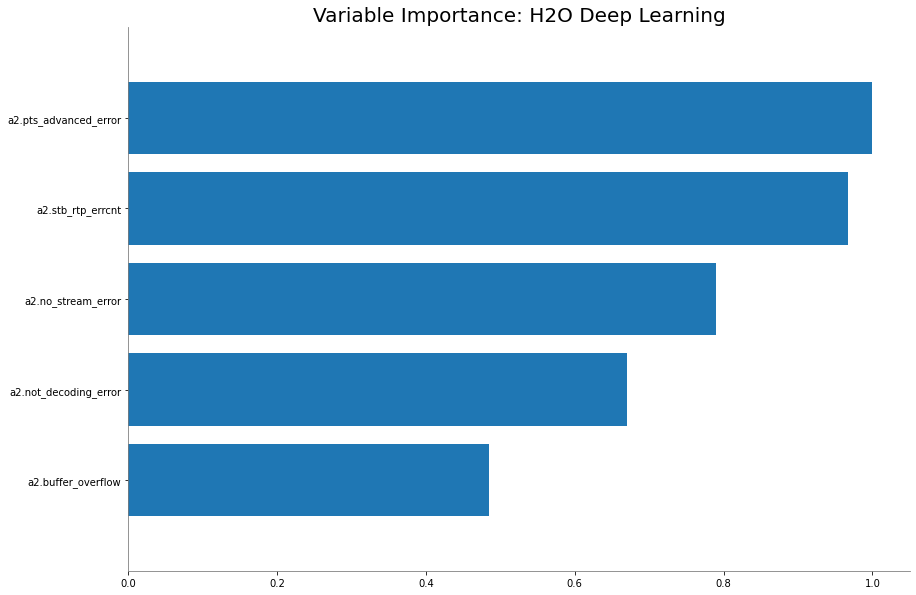

In [ ]:
dl.varimp_plot()

#모델 저장

In [ ]:
aml.leader.download_mojo(path = BASE_DIR)

'/content/GBM_grid__1_AutoML_20200625_005712_model_5.zip'